In [86]:
from selenium.webdriver import ActionChains
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
import requests
import time
import random

In [101]:
rand_value = [random.random() * random.randint(1, 3) for i in range(10)]	# 트래픽 과부하를 방지하기 위한 time.sleep에 필요한 random한 시간 생성 

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
res = requests.get("http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020502", user_agent)
print(res)

# 종목 필터링에 필요한 url로 바로 접근
driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
driver.get("http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020502")
driver.maximize_window()
time.sleep(rand_value[0])


# 필터링한 종목 조회 과정
dir = driver.find_element(By.ID, 'mktId_0_1')	# 시장구분 : 'KOSPI' 선택 
ActionChains(driver).click(dir).perform()
time.sleep(rand_value[1])

date_input = driver.find_element(By.ID, 'trdDd')	# 조회 일자 입력
ActionChains(driver).double_click(date_input).send_keys_to_element(date_input, "20170421").perform()
time.sleep(rand_value[2])

button = driver.find_element(By.CLASS_NAME, 'CI-MDI-UNIT-FILTER')	# 필터 클릭
ActionChains(driver).click(button).perform()
time.sleep(rand_value[3])

# 필터링
filter_button = driver.find_element(By.XPATH, '//*[@id="columnFilterModal0_all"]')	# 전체 해제
ActionChains(driver).click(filter_button).perform()
time.sleep(rand_value[4])
filter_button = driver.find_element(By.XPATH, '//*[@id="columnFilterModal0_0"]')	# 종목 코드
ActionChains(driver).click(filter_button).perform()
time.sleep(rand_value[5])
filter_button = driver.find_element(By.XPATH, '//*[@id="columnFilterModal0_1"]')	# 종목명
ActionChains(driver).click(filter_button).perform()
time.sleep(rand_value[6])
filter_button = driver.find_element(By.XPATH, '//*[@id="columnFilterModal0_6"]')	# PER
ActionChains(driver).click(filter_button).perform()
time.sleep(rand_value[7])
filter_button = driver.find_element(By.XPATH, '//*[@id="columnFilterModal0_10"]')	# PBR
ActionChains(driver).click(filter_button).perform()
time.sleep(rand_value[8])
button = driver.find_element(By.XPATH, '//*[@id="columnFilterModal0"]/div[3]/div/button[1]')	# 필터링 완료 버튼 클릭
ActionChains(driver).click(button).perform()
time.sleep(rand_value[9])

button = driver.find_element(By.XPATH, '//*[@id="jsSearchButton"]')		# 조회 클릭
ActionChains(driver).click(button).perform()
time.sleep(rand_value[0])

<Response [200]>


In [88]:
rand_value = [random.random()  for i in range(100)]

# PBR 란 sort 버튼 더블클릭하여 오름차순 정렬
per_grid_button = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[1]/div/div/table/thead/tr/td[7]/div/div')
ActionChains(driver).double_click(per_grid_button).perform()
time.sleep(rand_value[1])

stock_by_low_per = []
per_value = 0.0
tr_cnt = 1

low_per_list = driver.find_element(By.CLASS_NAME, 'CI-FREEZE-SCROLLER')
# PER 10 이하 인 종목의 종목 코드, 종목명, PER 스크래핑
while per_value < 10 :
    stock_nuber = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[{}]/td[1]'.format(tr_cnt)).text
    stock_name = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[{}]/td[2]'.format(tr_cnt)).text
    per = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[{}]/td[7]'.format(tr_cnt)).text
    per_value = float(per)
    stock_by_low_per.append([stock_nuber, stock_name, per_value])
    tr_cnt += 1
    if(tr_cnt == 77) : 
        tr_cnt -= 38
    driver.execute_script("arguments[0].scrollBy(0, 28)", low_per_list)

print(stock_by_low_per)

[['001520', '동양', 0.84], ['009180', '한솔로지스틱스', 1.41], ['003120', '일성신약', 1.81], ['015760', '한국전력', 2.13], ['034730', 'SK', 2.22], ['000320', '노루홀딩스', 2.41], ['011760', '현대상사', 2.81], ['013520', '화승알앤에이', 3.18], ['002320', '한진', 3.21], ['016740', '두올', 3.22], ['016880', '웅진', 3.82], ['011790', 'SKC', 3.85], ['030610', '교보증권', 4.02], ['079660', '사조해표', 4.11], ['123700', 'SJM', 4.19], ['214330', '금호에이치티', 4.28], ['002410', '범양건영', 4.39], ['001940', 'KISCO홀딩스', 4.44], ['000590', 'CS홀딩스', 4.53], ['020120', '다우인큐브', 4.6], ['008560', '메리츠종금증권', 4.61], ['200880', '서연이화', 4.67], ['021820', '세원정공', 4.68], ['004840', 'DRB동일', 4.76], ['058650', '세아홀딩스', 4.78], ['004090', '한국석유', 4.8], ['207940', '삼성바이오로직스', 4.82], ['138930', 'BNK금융지주', 4.87], ['008500', '일정실업', 4.92], ['041650', '상신브레이크', 4.95], ['011210', '현대위아', 5.02], ['007690', '국도화학', 5.08], ['004170', '신세계', 5.09], ['007860', '서연', 5.11], ['001200', '유진투자증권', 5.2], ['090350', '노루페인트', 5.21], ['100840', 'S&TC', 5.27], ['111110', '호전실업', 5.3],

In [92]:
# PBR 스크래핑 정 스크롤바 최상단으로 옴김
driver.execute_script("arguments[0].scrollBy(0, {})".format(9000*(-1)), low_per_list)

In [93]:
rand_value = [random.random()  for i in range(100)]
# PBR란 sort 버튼 더블클릭하여 오름차순 정렬
pbr_grid_button = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[1]/div/div/table/thead/tr/td[11]/div/div')
ActionChains(driver).double_click(pbr_grid_button).perform()
time.sleep(rand_value[1])

stock_by_low_pbr = []
pbr_value = 0.0
tr_cnt = 1

low_pbr_list = driver.find_element(By.CLASS_NAME, 'CI-FREEZE-SCROLLER')
# PBR 10 이하 인 종목의 종목 코드, 종목명, PBR 스크래핑
while pbr_value < 0.85 :
    stock_nuber = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[{}]/td[1]'.format(tr_cnt)).text
    stock_name = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[{}]/td[2]'.format(tr_cnt)).text
    pbr = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[{}]/td[11]'.format(tr_cnt)).text
    pbr_value = float(pbr)
    stock_by_low_pbr.append([stock_nuber, stock_name, pbr_value])
    tr_cnt += 1
    if(tr_cnt == 77) : 
        tr_cnt -= 38
    driver.execute_script("arguments[0].scrollBy(0, 28)", low_pbr_list)

print(stock_by_low_pbr)

[['003480', '한진중공업홀딩스', 0.18], ['011160', '두산건설', 0.2], ['000950', '전방', 0.24], ['016610', '동부증권', 0.25], ['097230', '한진중공업', 0.25], ['001530', '동일방직', 0.26], ['005620', '대성합동지주', 0.27], ['005010', '휴스틸', 0.28], ['009200', '무림페이퍼', 0.29], ['002200', '수출포장', 0.31], ['002300', '한국제지', 0.31], ['002220', '한일철강', 0.31], ['003530', '한화투자증권', 0.31], ['006200', '한국전자홀딩스', 0.32], ['001940', 'KISCO홀딩스', 0.33], ['003830', '대한화섬', 0.33], ['017940', 'E1', 0.34], ['001080', '만호제강', 0.35], ['000680', 'LS네트웍스', 0.36], ['004690', '삼천리', 0.36], ['058650', '세아홀딩스', 0.36], ['002030', '아세아', 0.36], ['010100', '한국프랜지', 0.36], ['023800', '인지컨트롤스', 0.37], ['001750', '한양증권', 0.37], ['000500', '가온전선', 0.38], ['015360', '예스코', 0.38], ['016880', '웅진', 0.38], ['071090', '하이스틸', 0.38], ['010660', '화천기계', 0.38], ['006370', '대구백화점', 0.39], ['008110', '대동전자', 0.39], ['016710', '대성홀딩스', 0.39], ['082740', '두산엔진', 0.39], ['010770', '평화홀딩스', 0.39], ['145210', '세화아이엠씨', 0.4], ['003240', '태광산업', 0.4], ['036530', 'S&T홀딩스', 0

In [102]:
from selenium.webdriver.common.keys import Keys

# 시세 스크래핑을 위해 '종목 시세 추이(월/연도)' 란으로 이동
menu_button = driver.find_element(By.XPATH, '//*[@id="jsMdiMenu"]/div[4]/ul/li[1]/ul/li[2]/div/div[1]/ul/li[2]/ul/li[1]/a')
ActionChains(driver).click(menu_button).perform()
driver.implicitly_wait(3)

menu_button = driver.find_element(By.XPATH, '//*[@id="jsMdiMenu"]/div[4]/ul/li[1]/ul/li[2]/div/div[1]/ul/li[2]/ul/li[1]/ul/li[4]/a')
ActionChains(driver).click(menu_button).perform()
time.sleep(5)

# 대상 선택에서 '개별 정목' 클릭
button = driver.find_element(By.ID, 'mktSelect2')
ActionChains(driver).click(button).perform()
driver.implicitly_wait(5)

# 월별 -> 연도별
select = Select(driver.find_element(By.ID, 'dateSel'))
select.select_by_index(1)
time.sleep(0.3)

# 시작연도 2018년으로 변경
select = Select(driver.find_element(By.ID, 'strtYear'))
select.select_by_index(5)


In [103]:
# 저 PER 종목들의 시세 변화율 스크래핑
for i in range(len(stock_by_low_per)) :
    time.sleep(2)
    stock_search_starts = driver.find_elements(By.CLASS_NAME, 'search')
    for stock_search_start in stock_search_starts :
        try : 
            search = stock_search_start.find_element(By.TAG_NAME, 'input')
            ActionChains(driver).click(search).perform()
            search.send_keys(Keys.ENTER)
            time.sleep(1)
            break
        except Exception :
            continue

    stock_number_input = driver.find_element(By.CLASS_NAME, 'pop_blue_box.pop_blue_box2').find_element(By.TAG_NAME, 'input')
    ActionChains(driver).click(stock_number_input).send_keys_to_element(stock_number_input, stock_by_low_per[i][0]).perform()
    stock_number_input.send_keys(Keys.ENTER)
    time.sleep(3)
    
    button_class = driver.find_element(By.ID, 'MDCSTAT018_FORM')
    button = button_class.find_element(By.ID, 'jsSearchButton')
    ActionChains(driver).click(button).perform()
    time.sleep(7)
    try : 
        before_price = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div[2]/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[1]/td[5]').text # 첫 div태그가 바뀔수 있음. 실행시 오류가 난다면 XPATH를 확인 후index를 바꿔줘야함
        after_price = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div[2]/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[6]/td[5]').text
        stock_by_low_per[i].append(100 * (float(after_price.replace(',','')) - float(before_price.replace(',','')))/ float(before_price.replace(',','')))
    except Exception :
        print(stock_by_low_per[i])
        continue

    print(stock_by_low_per[i])

['001520', '동양', 0.84, -47.971014492753625]
['009180', '한솔로지스틱스', 1.41, 129.43396226415095]
['003120', '일성신약', 1.81, -71.80962343096235]
['015760', '한국전력', 2.13, -42.35649546827795]
['034730', 'SK', 2.22, -35.80769230769231]
['000320', '노루홀딩스', 2.41, -17.306122448979593]
['011760', '현대상사', 2.81, -35.30249110320285]
['013520', '화승알앤에이', 3.18, 18.932038834951456]
['002320', '한진', 3.21, -61.152416356877325]
['016740', '두올', 3.22, 8.741258741258742]
['016880', '웅진', 3.82, -21.796690307328607]
['011790', 'SKC', 3.85, 198.60335195530726]
['030610', '교보증권', 4.02, -43.421052631578945]
['079660', '사조해표', 4.11, -43.421052631578945]
['123700', 'SJM', 4.19, 15.728476821192054]
['214330', '금호에이치티', 4.28, -88.06543385490754]
['002410', '범양건영', 4.39, 85.06493506493507]
['001940', 'KISCO홀딩스', 4.44, 53.45454545454545]
['000590', 'CS홀딩스', 4.53, -8.763693270735525]
['020120', '다우인큐브', 4.6, 242.53897550111358]
['008560', '메리츠종금증권', 4.61, 42.52336448598131]
['200880', '서연이화', 4.67, 208.76404494382024]
['02

In [104]:
# 저 PBR 종목들의 시세 변화율 스크래핑
for i in range(len(stock_by_low_pbr)) :
    time.sleep(2)
    stock_search_starts = driver.find_elements(By.CLASS_NAME, 'search')
    for stock_search_start in stock_search_starts :
        try : 
            search = stock_search_start.find_element(By.TAG_NAME, 'input')
            ActionChains(driver).click(search).perform()
            search.send_keys(Keys.ENTER)
            time.sleep(1)
            break
        except Exception :
            continue

    stock_number_input = driver.find_element(By.CLASS_NAME, 'pop_blue_box.pop_blue_box2').find_element(By.TAG_NAME, 'input')
    ActionChains(driver).click(stock_number_input).send_keys_to_element(stock_number_input, stock_by_low_pbr[i][0]).perform()
    stock_number_input.send_keys(Keys.ENTER)
    time.sleep(3)
    
    button_class = driver.find_element(By.ID, 'MDCSTAT018_FORM')
    button = button_class.find_element(By.ID, 'jsSearchButton')
    ActionChains(driver).click(button).perform()
    time.sleep(7)
    try : 
        before_price = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div[2]/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[1]/td[5]').text
        after_price = driver.find_element(By.XPATH, '//*[@id="jsMdiContent"]/div[2]/div[1]/div[1]/div[1]/div[2]/div/div/table/tbody/tr[6]/td[5]').text
        stock_by_low_pbr[i].append(100 * (int(after_price.replace(',','')) - int(before_price.replace(',','')))/ int(before_price.replace(',','')))
    except Exception :
        print(stock_by_low_pbr[i])
        continue

    print(stock_by_low_pbr[i])

['003480', '한진중공업홀딩스', 0.18, 37.54266211604096]
['011160', '두산건설', 0.2, 37.54266211604096]
['000950', '전방', 0.24, 110.78717201166181]
['016610', '동부증권', 0.25, -7.199100112485939]
['097230', '한진중공업', 0.25, 135.95166163141994]
['001530', '동일방직', 0.26, -60.7563025210084]
['005620', '대성합동지주', 0.27, -60.7563025210084]
['005010', '휴스틸', 0.28, -43.896103896103895]
['009200', '무림페이퍼', 0.29, -9.21985815602837]
['002200', '수출포장', 0.31, -82.59640102827764]
['002300', '한국제지', 0.31, -82.59640102827764]
['002220', '한일철강', 0.31, -83.38541666666667]
['003530', '한화투자증권', 0.31, 38.32923832923833]
['006200', '한국전자홀딩스', 0.32, 38.27160493827161]
['001940', 'KISCO홀딩스', 0.33, 53.45454545454545]
['003830', '대한화섬', 0.33, 14.218009478672986]
['017940', 'E1', 0.34, -12.724014336917563]
['001080', '만호제강', 0.35, 222.98850574712642]
['000680', 'LS네트웍스', 0.36, -4.637096774193548]
['004690', '삼천리', 0.36, 446.7032967032967]
['058650', '세아홀딩스', 0.36, 16.34121274409044]
['002030', '아세아', 0.36, 25.221238938053098]
['0101

['012800', '대창', 0.68, 68.32432432432432]
['000390', '삼화페인트', 0.68, -7.803468208092486]
['004170', '신세계', 0.68, -19.7265625]
['090370', '아비스타', 0.68, 46.71916010498688]
['000480', '조선내화', 0.68, -85.74850299401197]
['', '한국내화', 0.68, -85.74850299401197]
['079980', '휴비스', 0.68, -32.090545938748335]
['004840', 'DRB동일', 0.69, -32.77439024390244]
['006360', 'GS건설', 0.69, -49.02857142857143]
['017900', '광전자', 0.69, 12.592592592592593]
['000490', '대동공업', 0.69, 116.21621621621621]
['000430', '대원강업', 0.69, 1.8064516129032258]
['005030', '부산주공', 0.69, -0.4098360655737705]
['003690', '코리안리', 0.69, -12.933025404157044]
['003650', '미창석유', 0.7, -12.679738562091503]
['004490', '세방전지', 0.7, 49.93045897079277]
['025820', '이구산업', 0.7, 202.88713910761155]
['093050', 'LF', 0.71, -30.020120724346075]
['000210', '대림산업', 0.71, -49.36585365853659]
['002170', '삼양통상', 0.71, 18.969555035128806]
['005450', '신한', 0.71, 18.969555035128806]
['006740', '영풍제지', 0.71, 410.88235294117646]
['014830', '유니드', 0.71, 65.7142

In [105]:
# data가 잘 들어갔는지 확인 1
print(stock_by_low_per)

[['001520', '동양', 0.84, -47.971014492753625], ['009180', '한솔로지스틱스', 1.41, 129.43396226415095], ['003120', '일성신약', 1.81, -71.80962343096235], ['015760', '한국전력', 2.13, -42.35649546827795], ['034730', 'SK', 2.22, -35.80769230769231], ['000320', '노루홀딩스', 2.41, -17.306122448979593], ['011760', '현대상사', 2.81, -35.30249110320285], ['013520', '화승알앤에이', 3.18, 18.932038834951456], ['002320', '한진', 3.21, -61.152416356877325], ['016740', '두올', 3.22, 8.741258741258742], ['016880', '웅진', 3.82, -21.796690307328607], ['011790', 'SKC', 3.85, 198.60335195530726], ['030610', '교보증권', 4.02, -43.421052631578945], ['079660', '사조해표', 4.11, -43.421052631578945], ['123700', 'SJM', 4.19, 15.728476821192054], ['214330', '금호에이치티', 4.28, -88.06543385490754], ['002410', '범양건영', 4.39, 85.06493506493507], ['001940', 'KISCO홀딩스', 4.44, 53.45454545454545], ['000590', 'CS홀딩스', 4.53, -8.763693270735525], ['020120', '다우인큐브', 4.6, 242.53897550111358], ['008560', '메리츠종금증권', 4.61, 42.52336448598131], ['200880', '서연이화', 4.67, 20

In [106]:
# data가 잘 들어갔는지 확인 2
print(stock_by_low_pbr)

[['003480', '한진중공업홀딩스', 0.18, 37.54266211604096], ['011160', '두산건설', 0.2, 37.54266211604096], ['000950', '전방', 0.24, 110.78717201166181], ['016610', '동부증권', 0.25, -7.199100112485939], ['097230', '한진중공업', 0.25, 135.95166163141994], ['001530', '동일방직', 0.26, -60.7563025210084], ['005620', '대성합동지주', 0.27, -60.7563025210084], ['005010', '휴스틸', 0.28, -43.896103896103895], ['009200', '무림페이퍼', 0.29, -9.21985815602837], ['002200', '수출포장', 0.31, -82.59640102827764], ['002300', '한국제지', 0.31, -82.59640102827764], ['002220', '한일철강', 0.31, -83.38541666666667], ['003530', '한화투자증권', 0.31, 38.32923832923833], ['006200', '한국전자홀딩스', 0.32, 38.27160493827161], ['001940', 'KISCO홀딩스', 0.33, 53.45454545454545], ['003830', '대한화섬', 0.33, 14.218009478672986], ['017940', 'E1', 0.34, -12.724014336917563], ['001080', '만호제강', 0.35, 222.98850574712642], ['000680', 'LS네트웍스', 0.36, -4.637096774193548], ['004690', '삼천리', 0.36, 446.7032967032967], ['058650', '세아홀딩스', 0.36, 16.34121274409044], ['002030', '아세아', 0.36, 25.2

In [107]:
# 저 PER 저 PBR 종목(교집합)들을 따로 리스트에 저장
stock_by_low_per_pbr = []
for i in range(len(stock_by_low_per)) :
    for j in range(len(stock_by_low_pbr)) :
        if stock_by_low_per[i][0] in stock_by_low_pbr[j][0] :
            if len(stock_by_low_per[i])  == 4 and len(stock_by_low_pbr[j])  == 4 :
                stock_by_low_per_pbr.append([stock_by_low_per[i][0], stock_by_low_per[i][1], stock_by_low_per[i][2], stock_by_low_pbr[j][2], stock_by_low_pbr[j][3]])

print(stock_by_low_per_pbr)

[['001520', '동양', 0.84, 0.55, -47.971014492753625], ['015760', '한국전력', 2.13, 0.43, -42.35649546827795], ['000320', '노루홀딩스', 2.41, 0.59, -17.306122448979593], ['011760', '현대상사', 2.81, 0.56, -35.30249110320285], ['002320', '한진', 3.21, 0.46, -61.152416356877325], ['016740', '두올', 3.22, 0.79, 8.741258741258742], ['016880', '웅진', 3.82, 0.38, -21.796690307328607], ['011790', 'SKC', 3.85, 0.74, 198.60335195530726], ['030610', '교보증권', 4.02, 0.48, -43.421052631578945], ['079660', '사조해표', 4.11, 0.62, -23.90909090909091], ['123700', 'SJM', 4.19, 0.66, 15.728476821192054], ['001940', 'KISCO홀딩스', 4.44, 0.33, 53.45454545454545], ['000590', 'CS홀딩스', 4.53, 0.48, -8.763693270735525], ['200880', '서연이화', 4.67, 0.62, 208.76404494382024], ['004840', 'DRB동일', 4.76, 0.69, -32.77439024390244], ['058650', '세아홀딩스', 4.78, 0.36, 16.34121274409044], ['138930', 'BNK금융지주', 4.87, 0.42, -7.230559345156889], ['008500', '일정실업', 4.92, 0.61, -32.98701298701299], ['011210', '현대위아', 5.02, 0.53, 64.96551724137932], ['007690'

In [108]:
# 저 PER 종목 CSV 저장
import csv
csv_file = open('low_per.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['종목코드', '종목명', 'PER', '시세변화율(%)'])
for stock in stock_by_low_per :
    if len(stock) == 4 :
        row = [
            stock[0],
            stock[1],
            stock[2],
            stock[3]
        ]
    else :
        row = [
            stock[0],
            stock[1],
            stock[2]
        ]
    csv_writer.writerow(row)
csv_file.close()

In [109]:
# 저 PBR 종목 CSV 저장
csv_file = open('low_pbr.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['종목코드', '종목명', 'PBR', '시세변화율(%)'])
for stock in stock_by_low_pbr :
    if len(stock) == 4 :
        row = [
            stock[0],
            stock[1],
            stock[2],
            stock[3]
        ]
    else :
        row = [
            stock[0],
            stock[1],
            stock[2]
        ]
    csv_writer.writerow(row)
csv_file.close()

In [110]:
# 저 PER & 저 PBR 저장
csv_file = open('low_per_and_pbr.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['종목코드', '종목명', 'PER', 'PER', '시세변화율(%)'])
for stock in stock_by_low_per_pbr :
    row = [
        stock[0],
        stock[1],
        stock[2],
        stock[3],
        stock[4]
    ]
    csv_writer.writerow(row)
csv_file.close()

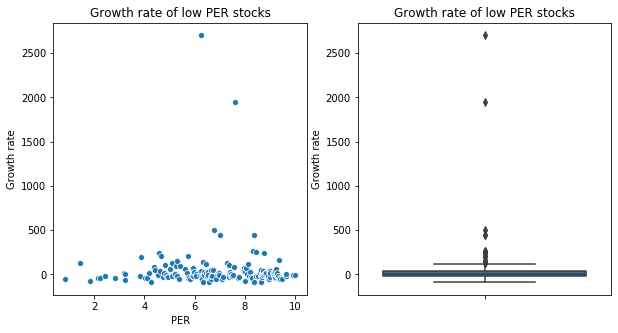

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))

area1 = fig.add_subplot(1, 2, 1)
plt.title("Growth rate of low PER stocks")
plt.xlabel("PER")
plt.ylabel("Growth rate")

area2 = fig.add_subplot(1, 2, 2)
plt.title("Growth rate of low PER stocks")
plt.ylabel("Growth rate")

# 저 PER 종목의 5년 후 시세 성장률 시각화
x = [stock[2] for stock in stock_by_low_per if len(stock) == 4]
y = [stock[3] for stock in stock_by_low_per if len(stock) == 4]
sns.scatterplot(x=x, y=y, ax = area1)
sns.boxplot(y = y, ax = area2)

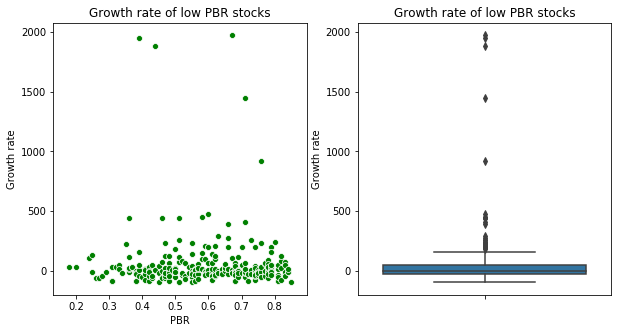

In [141]:
fig = plt.figure(figsize = (10, 5))

area1 = fig.add_subplot(1, 2, 1)
plt.title("Growth rate of low PBR stocks")
plt.xlabel("PBR")
plt.ylabel("Growth rate")

area2 = fig.add_subplot(1, 2, 2)
plt.title("Growth rate of low PBR stocks")
plt.ylabel("Growth rate")

# 저 PBR 종목의 5년 후 시세 성장률 시각화
x = [stock[2] for stock in stock_by_low_pbr if len(stock) == 4]
y = [stock[3] for stock in stock_by_low_pbr if len(stock) == 4]
sns.scatterplot(x=x, y=y, color = 'green', ax = area1)
sns.boxplot(y = y, ax = area2)

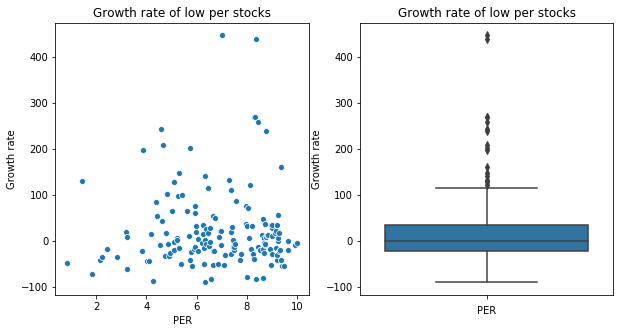

In [137]:
fig = plt.figure(figsize = (10, 5))

area1 = fig.add_subplot(1, 2, 1)
plt.title("Growth rate of low PER stocks")
plt.xlabel("PER")
plt.ylabel("Growth rate")

area2 = fig.add_subplot(1, 2, 2)
plt.title("Growth rate of low PER stocks")
plt.ylabel("Growth rate")

# 저 PER 종목들 중 성장률 500% 초과 종목 제외 
x = [stock[2] for stock in stock_by_low_per if len(stock) == 4 and stock[3] <= 500]
y = [stock[3] for stock in stock_by_low_per if len(stock) == 4 and stock[3] <= 500]
sns.scatterplot(x=x, y=y, ax = area1)
sns.boxplot(y = y, ax = area2)

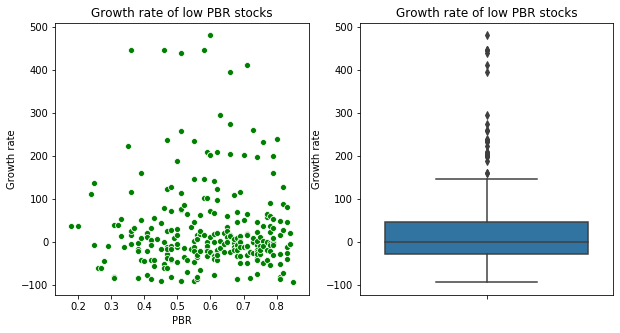

In [142]:
fig = plt.figure(figsize = (10, 5))

area1 = fig.add_subplot(1, 2, 1)
plt.title("Growth rate of low PBR stocks")
plt.xlabel("PBR")
plt.ylabel("Growth rate")

area2 = fig.add_subplot(1, 2, 2)
plt.title("Growth rate of low PBR stocks")
plt.ylabel("Growth rate")

# 저 PBR 종목들 중 성장률 500% 초과 종목 제외
x = [stock[2] for stock in stock_by_low_pbr if len(stock) == 4 and stock[3] <= 500]
y = [stock[3] for stock in stock_by_low_pbr if len(stock) == 4 and stock[3] <= 500]
sns.scatterplot(x=x, y=y, color = 'green', ax = area1)
sns.boxplot(y = y, ax = area2)

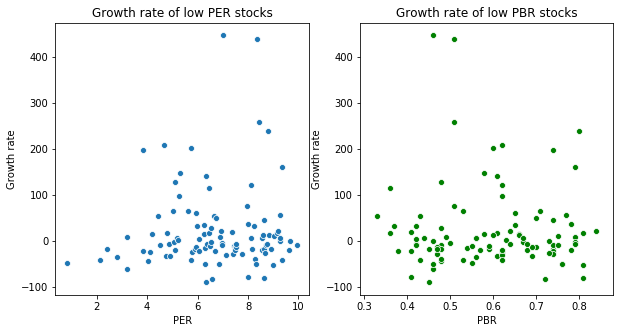

In [143]:
fig = plt.figure(figsize = (10, 5))

area1 = fig.add_subplot(1, 2, 1)
plt.title("Growth rate of low PER stocks")
plt.xlabel("PER")
plt.ylabel("Growth rate")

area2 = fig.add_subplot(1, 2, 2)
plt.title("Growth rate of low PBR stocks")
plt.xlabel("PBR")
plt.ylabel("Growth rate")

x1 = [stock[2] for stock in stock_by_low_per_pbr if stock[4] <= 500]
y1 = [stock[4] for stock in stock_by_low_per_pbr if stock[4] <= 500]
x2 = [stock[3] for stock in stock_by_low_per_pbr if stock[4] <= 500]
y2 = [stock[4] for stock in stock_by_low_per_pbr if stock[4] <= 500]
sns.scatterplot(x = x1, y = y1, ax = area1)
sns.scatterplot(x = x2, y = y2, ax = area2, color = 'green')